### Problem Statement:
- Given a grayscale image with uneven (non-uniform)illumination, convert it into a bianry image (only black and white).
- Also compare multiple thresholding techniques to determine which works best under uneven lighting.


### What is Thresholding?
- A grayscale image has pixel values from 0 to 255.
- Thresholding converts it into binary using a rule:

$$ If pixel value > T => white (255) $$

$$ Else => Black (0) $$


The entire problem is about how you choose $T$.

### Why uneven illumination is hard?

In evenly lit images:
- Background intensity is uniform
- Foreground is clearly brighter or darker
- One threshold works for the whole image


In uneven lighting:
- Some background areas are dark
- Some background areas are bright
- A single global threshold often fails

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [32]:
# Create a grayscale image with uneven illumination

height, width = 256, 256

# Create a gradient (uneven lighting)
x = np.linspace(0, 1, width)
y = np.linspace(0, 1, height)
X, Y = np.meshgrid(x, y)
illumination = (X + Y) * 127

# Add a circular object (foreground)
image = illumination.copy()
cv2.circle(image, (128, 128), 80, 100, -1)

# Clip values and convert to uint8
image = np.clip(image, 0, 255).astype(np.uint8)

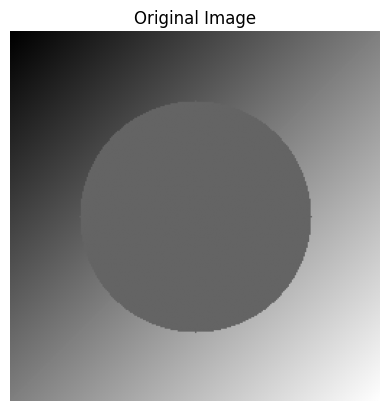

In [33]:
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis("off")
plt.show()

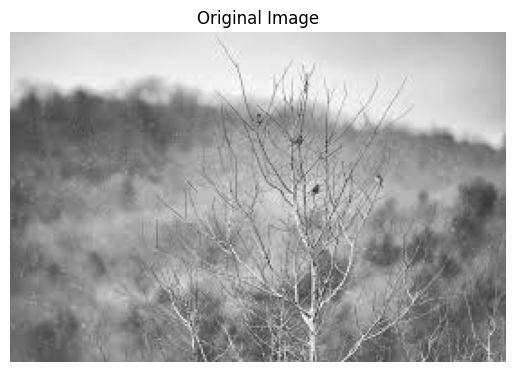

In [21]:
import cv2
import matplotlib.pyplot as plt

# image loading
image = cv2.imread("image.jpeg")


plt.imshow(image)
plt.title("Original Image")
plt.axis("off")
plt.show()

In [24]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

### 1. Manual (Global) Thresholding

The threshold is fixed and manually chosen. (let say $127$)

This says that,
- $ Pixels > 127 => white $
- $ Pixels <= 127 => Black $



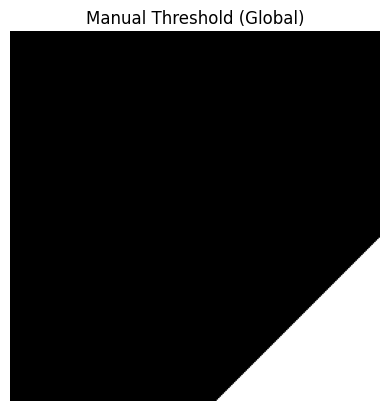

In [46]:
_, manual_thresh = cv2.threshold(
    image, 197, 255, cv2.THRESH_BINARY
)

plt.imshow(manual_thresh, cmap='gray')
plt.title("Manual Threshold (Global)")
plt.axis('off')
plt.show()

## 2. Otsu's Thresholding

Otsu's method automatically finds a global threshold by analyzing the histogram.

It assumes:
- Image has two classes (background + foreground)
- Histogram is bimodal

Otsu's method chooses the threshold that
- minimizes variance within classes
- maximizes variance between classes

It finds the threshold that best seperates dark and bright pixels gloablly.

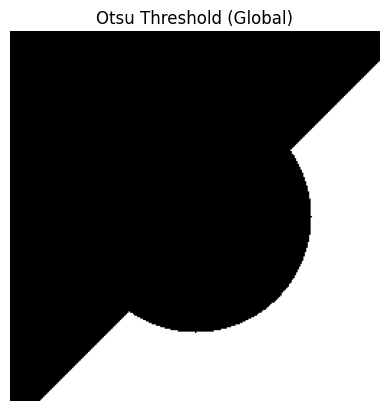

In [35]:
_, otsu_thresh = cv2.threshold(
    image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU
)

plt.imshow(otsu_thresh, cmap='gray')
plt.title("Otsu Threshold (Global)")
plt.axis('off')
plt.show()

## 3. Mean Adaptive Thresholding

Instead of one global threshold:
- Each pixel gets its own threshold.
- $ \text{Threshold} = \text{mean of a local neighbourhood} - c $



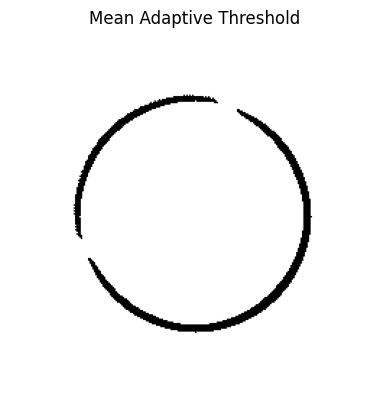

In [36]:
mean_adaptive = cv2.adaptiveThreshold(
    image, 255,
    cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,
    blockSize=11, C=2
)

plt.imshow(mean_adaptive, cmap='gray')
plt.title("Mean Adaptive Threshold")
plt.axis('off')
plt.show()

## 4. Gaussian Adaptive Thresholding

It is quite similar to the mean adaptive, but:
- Uses gaussian weighted average
- conter picxels contribute more than the distant ones.

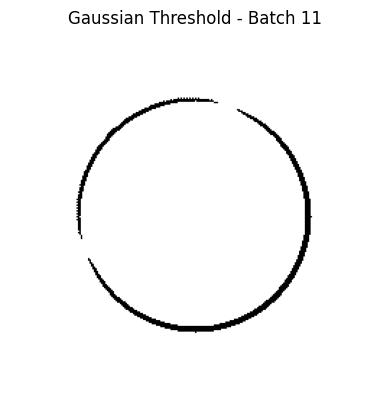

In [37]:
gaussian_11 = cv2.adaptiveThreshold(
    image, 255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,
    blockSize=11, C=2
)

plt.imshow(gaussian_11, cmap='gray')
plt.title("Gaussian Threshold - Batch 11")
plt.axis('off')
plt.show()

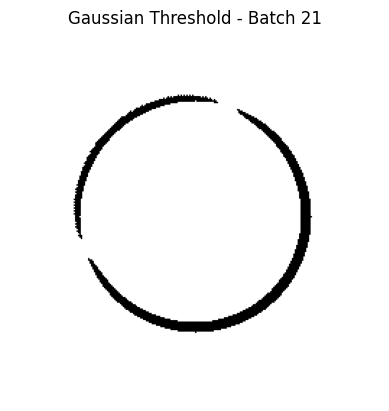

In [38]:
gaussian_21 = cv2.adaptiveThreshold(
    image, 255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,
    blockSize=21, C=2
)

plt.imshow(gaussian_21, cmap='gray')
plt.title("Gaussian Threshold - Batch 21")
plt.axis('off')
plt.show()

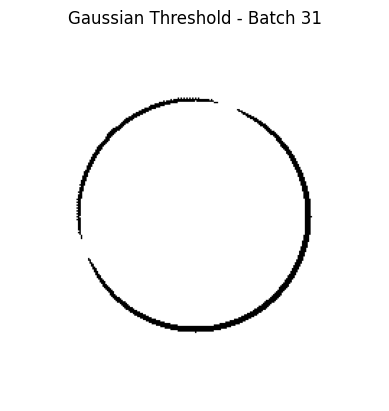

In [39]:
gaussian_31 = cv2.adaptiveThreshold(
    image, 255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,
    blockSize=11, C=2
)

plt.imshow(gaussian_31, cmap='gray')
plt.title("Gaussian Threshold - Batch 31")
plt.axis('off')
plt.show()

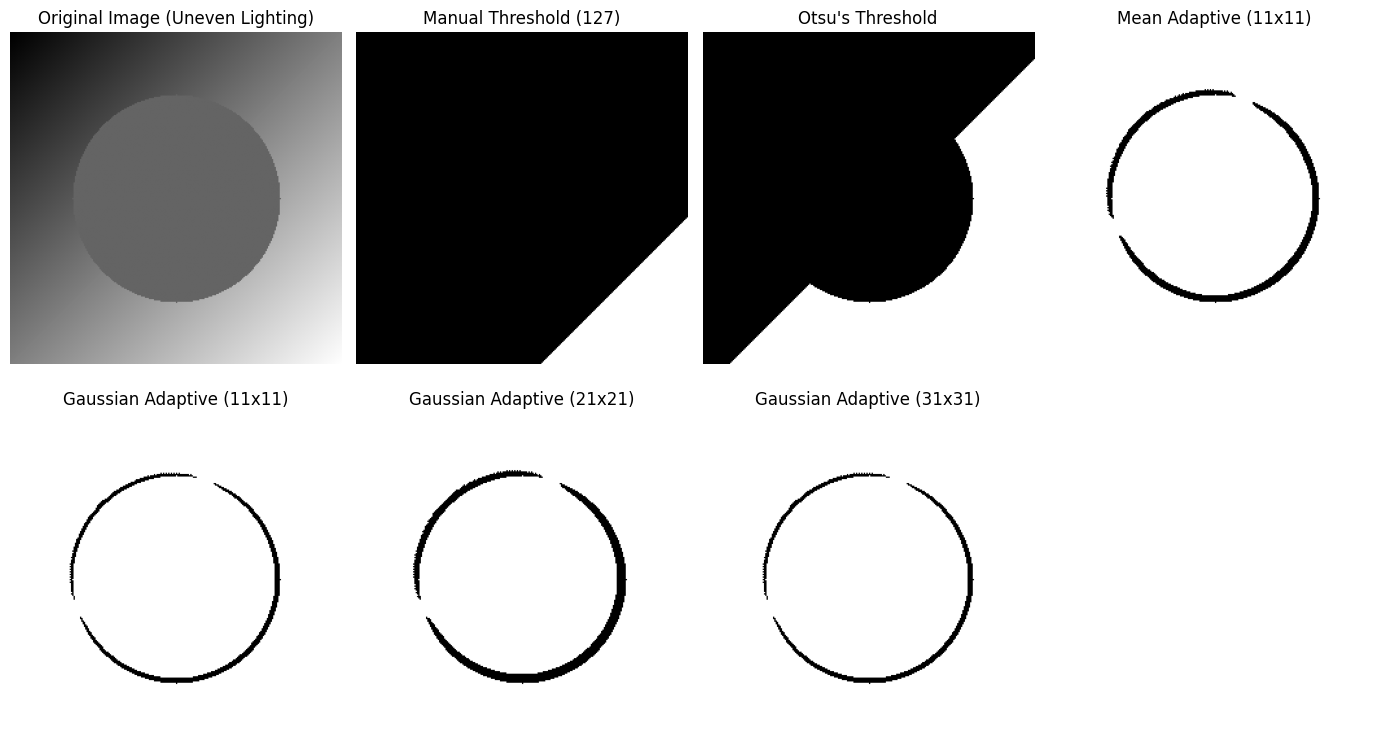

In [47]:
titles = [
    "Original Image (Uneven Lighting)",
    "Manual Threshold (127)",
    "Otsu's Threshold",
    "Mean Adaptive (11x11)",
    "Gaussian Adaptive (11x11)",
    "Gaussian Adaptive (21x21)",
    "Gaussian Adaptive (31x31)"
]

images = [
    image,
    manual_thresh,
    otsu_thresh,
    mean_adaptive,
    gaussian_11,
    gaussian_21,
    gaussian_31
]

plt.figure(figsize=(14, 8))

for i in range(len(images)):
    plt.subplot(2, 4, i + 1)
    plt.imshow(images[i], cmap="gray")
    plt.title(titles[i])
    plt.axis("off")

plt.tight_layout()
plt.show()